
<br><br>


<h1 style="text-align: center;"> Startup investment in the Nordic countries </h1>

<p style="text-align: center;"> by Omar Ismail, Arda Acikalin, Yemeskabeba Gessesse and Dmitry Tolonen </p> 

<br>

<img src="https://storage.googleapis.com/kaggle-datasets-images/517018/952128/223d16c25beb4f366ec5fa21e801deda/dataset-cover.jpg?t=2020-02-17-22-01-31" alt="Kaggle: Startup investment in the Nordic countries">

<br>

Based on the <b>StartUp Investments (Crunchbase) dataset</b> - Information about startup companies and investment via Crunchbase 
https://www.kaggle.com/arindam235/startup-investments-crunchbase

<br><br><br>    

        
### <u>Table of contents:</u>

<br>
    

    
    
[Introduction to our dataset](#Introduction-to-our-dataset)

[Challenges of the dataset and Jupyter collaboration](#Challenges-of-the-dataset-and-Jupyter-collaboration)

[Focusing our study: Startup investment in the Nordic countries](#Focusing-our-study:-Startup-investment-in-the-Nordic-countries)

[Data clean up stage](#Data-clean-up-stage)

[Visualisation: Status, scale and popular market segments for investors](#Visualisation:-Status,-scale-and-popular-market-segments-for-investors) 

[Visualisation: Startup status, Public grants, debt and a word about Finland](#Visualisation:-Startup-status,-Public-grants,-debt-and-a-word-about-Finland)
    
[Visualisation: Success stories, funding rounds and private funding](#Visualisation:-Success-stories,-funding-rounds-and-private-funding)

[In closing: conclusions and future research](#In-closing:-conclusions-and-future-opportunities-for-research)

<br><br><br>   


<br><br>

### **Introduction to our dataset**

**StartUp Investments (Crunchbase):**
https://www.kaggle.com/arindam235/startup-investments-crunchbase


- The dataset we used was downloaded from Kaggle but the source of the data is from Crunchbase, which is described as "a platform for finding business information about private and public companies." 

<br>

**The dataset consists mostly of financial data relating to startup investment, such as:**

- startup name 
- url
- market segment/category (e.g. software, biotech, health and fitness, real estate, search, mobile, education, transportation, finance etc.)
- status (operating, acquired, closed)
- location: country, city, region
- funding: total funding in usd, type of funding (public grant, seed, angel, debt taken, venture capital & so-called funding rounds)


<br>

- The Kaggle page description indicates an interest in seeing whether subsequent rounds of investment help a company to move to a company status of 'operating/closed/aquired', presumably from a status of starting up or seed/grant/angel funding. At face level, this sounds like a obvious description, but we were interested in digging deeper into the data relating to the industries that could possibly employ us and funders that could possibly finance any startup ideas of ours.


In [1]:
# Importing necessary Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<br><br>

### **Challenges of the dataset and Jupyter collaboration**

- The dataset is fairly large at 39 columns and 50k rows, so we knew a lot of the data would not readily serve our purposes. Also there was some data that would be redundant for us, duplicating date data etc. This we would tackle in our choices tof focus on a subset of countries and columns as well as in the clean up stage. 
- In researching collaboration methods for our group, we landed on using Google's Colab tools, which is an online Jupyter environment linked to your Google account. We used this, Hangouts and Whatsapp for communication and had set up a Google Slides doc in case we had to present in Powerpoint/Slides format. 
- Although Colab has proven to be reliable, there have been some hiccups and therefore, we mainly used our Colab Jupyter document as a central repository of our current/overnight work as well as a sketchbook while meeting in Google Hangouts. We did our main data analysis on our own Jupyter environments on our computers. 
- Another thing to note about Colab: we stored our Colab work in Dmitry's Google Drive, which required frequent authentication for every user, so to solve this issue, the CSV file was moved to a website (dmitrytolonen.com in the read_csv cell), as this avoided the authentication issue and allowed everyone better access to the work file. 
- Finally, the dataset lacked some data to which we would have liked to have access, such as more data about the entities making acquisitions, whether they were large, rich countries such as the US, China etc. or whether the Nordic IP remained in the region (with its potential employment and taxation ramifications).


In [2]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_column',None)

In [3]:
investments = pd.read_csv('../investments_VC.csv', encoding = "ISO-8859-1")

<br><br>

### **Focusing our study: Startup investment in the Nordic countries**

Ok, let's get to work! Well, we have too much data at our hands, so first we had a look at the structure and brief contents of the data, such as the columns. We soon chose to select a subset of columns along our focus on the Nordics, avoiding some overlap especially in the date-related columns.

In [4]:
investments.head()

# for a quick glance at the material's first five rows.

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
investments.info()

# using the Pandas info function, we get a summary of the dataframe's contents, 
# eg. dtypes, columns and their names, entries and non-null values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [6]:
investments.describe()
# for some statistics on the dataframe's non-null entries (49k+) as well as its the mean, min, max values etc. - how the data is distributed. 

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,2.074286e+06,6.088736e+05,4.434360e+05,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,3.167231e+07,2.678348e+07,3.428169e+07,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [7]:
# Choosing the most suitable columns for our study
investments = investments[['name', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'region',
       'city', 'funding_rounds', 'founded_at','first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']]

In [8]:
# Further limiting our dataset to only nordic countries and setting the index from the default to 'country_code'
investments = investments.set_index('country_code')

In [9]:
# Using the Pandas loc function to access specific labelled rows and columns 
investments = investments.loc[['FIN', 'SWE', 'NOR', 'DNK', 'ISL'], :]

In [10]:
# For a random sample from the selected subset

investments.sample(10)

,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
country_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SWE,Clavister,Security,-,operating,SWE - Other,Örnsköldsvik,1.0,1997-01-01,2012-04-16,2012-04-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SWE,Tracab,NaN,"26,90,000",operating,Stockholm,Solna,1.0,2003-01-01,2005-09-07,2005-09-07,0.0,2690000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SWE,Ludesi,Biotechnology,"34,38,286",operating,Malmo,Malma,1.0,NaN,2006-09-20,2006-09-20,0.0,0.0,0.0,3438286.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NOR,Vaccibody,Biotechnology,"34,90,077",operating,Oslo,Oslo,2.0,2007-01-01,2012-11-12,2013-06-26,943077.0,0.0,0.0,0.0,0.0,0.0,0.0,2547000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NOR,Numascale,Web Hosting,"83,40,000",operating,Oslo,Oslo,2.0,2008-01-01,2009-09-02,2012-07-23,0.0,8340000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,"Showell - The Simple, Fast and Elegant Tablet ...",NaN,"3,65,000",operating,Jyväskylä,Jyväskylä,2.0,2012-04-15,2014-04-01,2014-08-01,120000.0,0.0,0.0,0.0,0.0,0.0,0.0,245000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SWE,Hoodin,Online Travel,"4,75,000",operating,Malmo,Malmö,2.0,2012-09-01,2013-10-01,2014-05-01,475000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SWE,Efield,Software,"6,02,000",operating,Stockholm,Kista,1.0,NaN,2006-04-26,2006-04-26,0.0,602000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SWE,Coresonic,Hardware + Software,"18,01,500",acquired,Linkoping,Linköping,1.0,2004-01-01,2010-06-09,2010-06-09,0.0,1801500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
investments['round_F'].unique()
# We were interested in seeing whether there is much - or any - useful data in round_F - or, actually, after round_C

array([0.000000e+00, 3.800204e+06, 2.500000e+08, 1.354000e+08])

In [12]:
investments.head()

,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
country_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FIN,720°,Predictive Analytics,"1,90,035",operating,Helsinki,Espoo,1.0,2012-01-01,2014-10-23,2014-10-23,190035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,Aava Mobile,Mobile,"42,60,000",operating,Helsinki,Helsinki,1.0,2009-01-01,2009-06-03,2009-06-03,0.0,4260000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,Academica,Consulting,-,operating,Helsinki,Helsinki,1.0,NaN,2011-08-24,2011-08-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,AddSearch,Enterprise Search,"6,50,000",operating,Helsinki,Helsinki,1.0,2013-01-01,2013-11-07,2013-11-07,650000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,Aito Technologies,Software,"34,03,750",operating,Helsinki,Espoo,1.0,2006-11-01,2007-08-24,2007-08-24,3403750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
investments.reset_index()


,country_code,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,FIN,720°,Predictive Analytics,"1,90,035",operating,Helsinki,Espoo,1.0,2012-01-01,2014-10-23,2014-10-23,190035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FIN,Aava Mobile,Mobile,"42,60,000",operating,Helsinki,Helsinki,1.0,2009-01-01,2009-06-03,2009-06-03,0.0,4260000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FIN,Academica,Consulting,-,operating,Helsinki,Helsinki,1.0,NaN,2011-08-24,2011-08-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FIN,AddSearch,Enterprise Search,"6,50,000",operating,Helsinki,Helsinki,1.0,2013-01-01,2013-11-07,2013-11-07,650000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FIN,Aito Technologies,Software,"34,03,750",operating,Helsinki,Espoo,1.0,2006-11-01,2007-08-24,2007-08-24,3403750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,ISL,Snjohus Software,Apps,"16,000",operating,Reyjavik,Reykjavík,1.0,2013-06-01,2013-06-15,2013-06-15,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
829,ISL,SuitMe,Software,"16,000",operating,Reyjavik,Reykjavík,1.0,2014-06-17,2014-06-17,2014-06-17,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
830,ISL,Tour Desk,Tourism,"4,000",operating,Reyjavik,Reykjavík,1.0,2013-11-01,2013-11-20,2013-11-20,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
831,ISL,Transmit,Sales and Marketing,"4,50,000",operating,Reyjavik,Reykjavík,1.0,2009-06-01,2010-11-29,2010-11-29,0.0,450000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<br><br>

### **Data clean up stage**

- At this stage, we wanted to make sure some of the spaces, commas, dtypes, date types and decimal places were correct and usable for our purposes. We also dropped columns with zero values (in particular, funding rounds) and grouped countries by country_code.
- We used the replace function for commas and spaces, pd.to.datetime function for date changes and groupby for grouping by country_code label and, finally, the drop function for dropping columns with zero values. 


In [14]:
#cleaning column names and reformatting the data
#Column names had some empty spaces
investments.columns = investments.columns.str.replace(' ','')

In [15]:
#removed the commas from the total funding
investments.funding_total_usd = investments.funding_total_usd.str.replace(',','')

In [16]:
#it was string, now it is a float.
investments.funding_total_usd = pd.to_numeric(investments.funding_total_usd, errors='coerce')


In [17]:
# changing the data type for column founded_at to datetime type
investments['founded_at'] = pd.to_datetime(investments['founded_at'], errors = 'coerce' )


In [18]:
# changing the data type for column first_funding_at to datetime type
investments.first_funding_at = pd.to_datetime(investments.first_funding_at, format='%Y/%m/%d', errors='coerce')


In [19]:
# changing the data type for column first_funding_at to datetime type
investments.first_funding_at = pd.to_datetime(investments.first_funding_at, format='%Y/%m/%d', errors='coerce')


In [20]:
# Now we can groupby country code.
investments.groupby('country_code').mean()

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
country_code,,,,,,,,,,,,,,,,,,,,,,,
DNK,8.165931e+06,1.366667,258798.557143,3.985626e+06,142.857143,20476.190476,619.514286,33333.333333,45479.438095,13547.619048,1.079930e+06,0.000000,0.000000,0.0,6000.000000,5.989378e+05,4.178445e+05,1.700357e+05,138142.857143,0.000000,644761.904762,0.0,0.0
FIN,6.251534e+06,1.422680,380874.051546,4.315700e+06,5498.814433,4831.659794,0.000000,175987.458763,166423.020619,13400.546392,6.701031e+05,0.000000,0.000000,0.0,3125.237113,1.169441e+06,1.046033e+06,3.357320e+05,0.000000,82474.226804,0.000000,0.0,0.0
ISL,3.281002e+06,1.312500,65474.000000,2.953125e+06,0.000000,0.000000,0.000000,0.000000,21875.000000,25266.000000,0.000000e+00,0.000000,0.000000,0.0,10199.500000,6.843750e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0
NOR,9.156303e+06,1.479592,149348.979592,4.560979e+06,0.000000,3286.673469,1122.448980,959183.673469,85261.316327,35523.214286,1.960123e+06,0.000000,0.000000,0.0,0.000000,7.309094e+05,6.292755e+05,1.163464e+06,0.000000,0.000000,0.000000,0.0,0.0
SWE,1.072787e+07,1.460317,190803.193651,7.015214e+06,2761.904762,266389.396825,3292.063492,29115.438095,111994.431746,1243.539683,7.097892e+05,160634.920635,667888.031746,0.0,2133.342857,1.231529e+06,9.481023e+05,1.328022e+06,465714.285714,317460.317460,805714.933333,0.0,0.0


In [21]:
# deleting the columns round_G and round_H because all the countries have zero values
investments = investments.drop(["round_G", "round_H"], axis=1)


In [22]:
# rounding the mean values to 4 decimal places
investments.groupby('country_code').mean().round(4)

,funding_total_usd,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F
country_code,,,,,,,,,,,,,,,,,,,,,
DNK,8.165931e+06,1.3667,258798.5571,3.985626e+06,142.8571,20476.1905,619.5143,33333.3333,45479.4381,13547.6190,1.079930e+06,0.0000,0.0000,0.0,6000.0000,5.989378e+05,4.178445e+05,1.700357e+05,138142.8571,0.0000,644761.9048
FIN,6.251534e+06,1.4227,380874.0515,4.315700e+06,5498.8144,4831.6598,0.0000,175987.4588,166423.0206,13400.5464,6.701031e+05,0.0000,0.0000,0.0,3125.2371,1.169441e+06,1.046033e+06,3.357320e+05,0.0000,82474.2268,0.0000
ISL,3.281002e+06,1.3125,65474.0000,2.953125e+06,0.0000,0.0000,0.0000,0.0000,21875.0000,25266.0000,0.000000e+00,0.0000,0.0000,0.0,10199.5000,6.843750e+05,0.000000e+00,0.000000e+00,0.0000,0.0000,0.0000
NOR,9.156303e+06,1.4796,149348.9796,4.560979e+06,0.0000,3286.6735,1122.4490,959183.6735,85261.3163,35523.2143,1.960123e+06,0.0000,0.0000,0.0,0.0000,7.309094e+05,6.292755e+05,1.163464e+06,0.0000,0.0000,0.0000
SWE,1.072787e+07,1.4603,190803.1937,7.015214e+06,2761.9048,266389.3968,3292.0635,29115.4381,111994.4317,1243.5397,7.097892e+05,160634.9206,667888.0317,0.0,2133.3429,1.231529e+06,9.481023e+05,1.328022e+06,465714.2857,317460.3175,805714.9333


In [23]:
# rounding the values of the data frame to 4 decimal places
investments= investments.round(4)
investments

,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F
country_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FIN,720°,Predictive Analytics,190035.0,operating,Helsinki,Espoo,1.0,2012-01-01,2014-10-23,2014-10-23,190035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,Aava Mobile,Mobile,4260000.0,operating,Helsinki,Helsinki,1.0,2009-01-01,2009-06-03,2009-06-03,0.0,4260000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,Academica,Consulting,NaN,operating,Helsinki,Helsinki,1.0,NaT,2011-08-24,2011-08-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,AddSearch,Enterprise Search,650000.0,operating,Helsinki,Helsinki,1.0,2013-01-01,2013-11-07,2013-11-07,650000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,Aito Technologies,Software,3403750.0,operating,Helsinki,Espoo,1.0,2006-11-01,2007-08-24,2007-08-24,3403750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISL,Snjohus Software,Apps,16000.0,operating,Reyjavik,Reykjavík,1.0,2013-06-01,2013-06-15,2013-06-15,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISL,SuitMe,Software,16000.0,operating,Reyjavik,Reykjavík,1.0,2014-06-17,2014-06-17,2014-06-17,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISL,Tour Desk,Tourism,4000.0,operating,Reyjavik,Reykjavík,1.0,2013-11-01,2013-11-20,2013-11-20,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
investments.columns

Index(['name', 'market', 'funding_total_usd', 'status', 'region', 'city',
       'funding_rounds', 'founded_at', 'first_funding_at', 'last_funding_at',
       'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F'],
      dtype='object')

In [25]:
# We discuss whether to keep the region column instead of the city column, 
# as 'region' is clearer and less complex when we run data analysis

investments['region'].unique()

array(['Helsinki', 'Turku', 'Oulu', 'Vantaa', 'Tampere', 'FIN - Other',
       'Kuopio', 'Lappeenranta', 'Jyväskylä', 'Stockholm', 'SWE - Other',
       'Linkoping', 'Malmo', 'Gothenburg', 'Jonkoping', 'Lulea',
       'Sundsvall', 'Jamtlands Lan', 'Umea', 'Norrkoping', 'Karlskrona',
       'Halmstad', 'Danderyd', 'Aust-Agder', 'Trondheim', 'NOR - Other',
       'Oslo', 'Sandnes', 'Lysaker', 'Tromso', 'Fornebu', 'Skien',
       'Kristiansand', 'Stavanger', 'Copenhagen', 'DNK - Other',
       'Ballerup', 'Lyngby', 'Aarhus', 'Frederiksberg', 'Valby', 'Vejle',
       'Aalborg', 'Odense', 'Hørsholm', 'Allerød', 'Herlev', 'Kolding',
       'Hellerup', 'Taastrup', 'Farum', 'Reyjavik', 'ISL - Other'],
      dtype=object)

In [26]:
# So, our option would be to drop the city column as it DOES ADD lots of complex data when we run data analysis

investments['city'].unique()

array(['Espoo', 'Helsinki', 'Turku', 'Oulu', 'Vantaa', 'Tampere', 'Sipoo',
       'Kuopio', 'Nokia', 'Kaarina', 'Lappeenranta', 'Jyväskylä',
       'Kajaani', 'Itäharju', 'Mikkeli', 'Kempele', 'Uusikaupunki',
       'Stockholm', 'Kista', 'Härnösand', 'Linköping', 'Helsingborg',
       'Göteborg', 'Malmö', 'Gothenburg', 'Jönköping', nan, 'Skarpnäck',
       'Limhamn', 'Lund', 'Västra Frölunda', 'Luleå', 'Malma',
       'Örnsköldsvik', 'Sundsvall', 'Falkenberg', 'Partille', 'Uppsala',
       'Umeå', 'Bodafors', 'Solna', 'Mölndal', 'Upplands-väsby', 'Gävle',
       'Skövde', 'Norrköping', 'Åkarp', 'Karlskrona', 'Jämtland',
       'Hyssna', 'Täby', 'Halmstad', 'Karlstad', 'Huddinge', 'Falun',
       'Västerås', 'Haninge', 'Sundbyberg', 'Hammenhög', 'Norrtälje',
       'Johannesberg', 'Sölvesborg', 'Danderyd', 'Värmdö', 'Trondheim',
       'Fredrikstad', 'Sarpsborg', 'Tiller', 'Mjømna', 'Porsgrunn',
       'Oslo', 'Asker', 'Sandnes', 'Hvalstad', 'Lysaker', 'Ballstad',
       'Tromsø', 'Forn

In [27]:
# We decide to go with dropping the city column for clarity's sake.
investments = investments.drop(["city"], axis=1)


### **Visualisation: Status, scale and popular market segments for investors**
- Here's where we get into the fun part. In both tabular and visual form, we can inspect the data we have and make some observations and connections from our selected statistics. 
- We move closer into our central focus and compare the Nordic countries in a number of areas.

In [28]:
investments.head()

,name,market,funding_total_usd,status,region,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F
country_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FIN,720°,Predictive Analytics,190035.0,operating,Helsinki,1.0,2012-01-01,2014-10-23,2014-10-23,190035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,Aava Mobile,Mobile,4260000.0,operating,Helsinki,1.0,2009-01-01,2009-06-03,2009-06-03,0.0,4260000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,Academica,Consulting,NaN,operating,Helsinki,1.0,NaT,2011-08-24,2011-08-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,AddSearch,Enterprise Search,650000.0,operating,Helsinki,1.0,2013-01-01,2013-11-07,2013-11-07,650000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIN,Aito Technologies,Software,3403750.0,operating,Helsinki,1.0,2006-11-01,2007-08-24,2007-08-24,3403750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


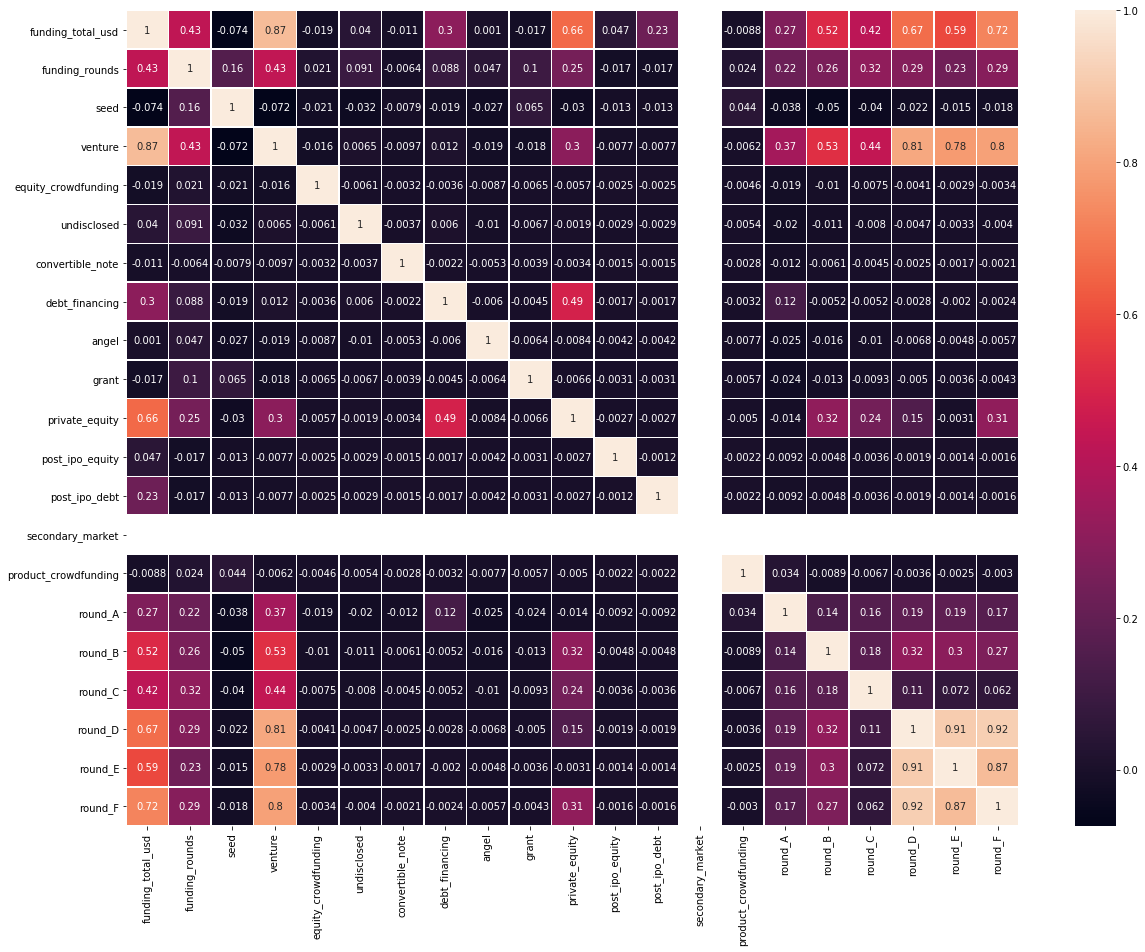

In [29]:
plt.subplots(figsize=(20,15))

sns.heatmap(investments.corr(), annot=True, linewidth=0.5);

# This heat map serves to give us a bigger picture of our investments data. 

In [30]:
# Ungroup dataset

investments = investments.reset_index(level='country_code')

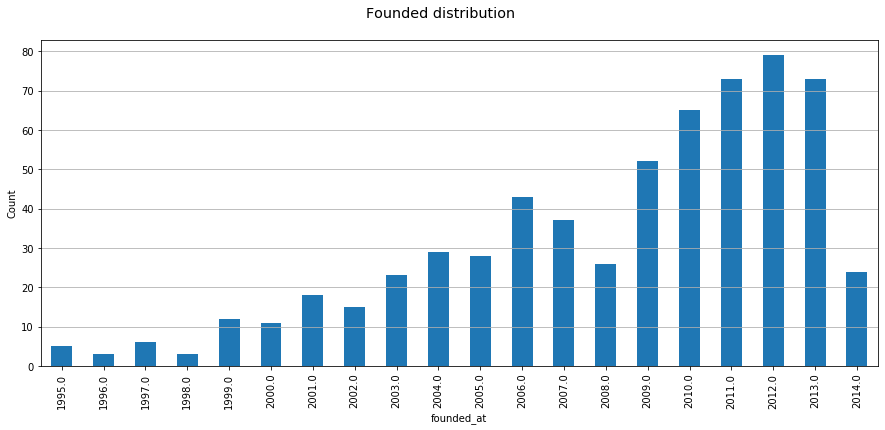

In [31]:
# Startup etablishment for the past 20 years in Nordic countries (NC)

plt.rcParams['figure.figsize'] = 15,6
investments['name'].groupby(investments["founded_at"].dt.year).count().tail(20).plot(kind="bar")

ax = plt.axes()        
ax.yaxis.grid()
plt.ylabel('Count')
plt.title("Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [32]:
# The total number of startups in each Nordic country

investments['country_code'].value_counts()

SWE    315
DNK    210
FIN    194
NOR     98
ISL     16
Name: country_code, dtype: int64

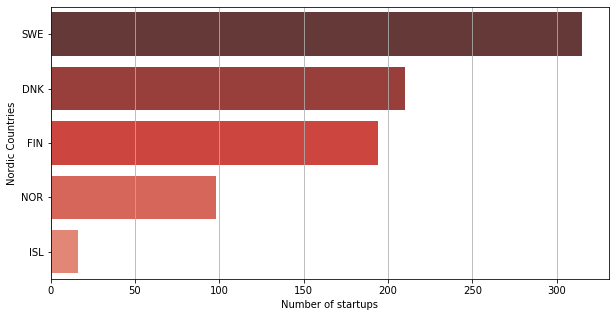

In [33]:
# The total number of startups in each Nordic country

plt.figure(figsize=(10,5))

sns.barplot(x=investments['country_code'].value_counts(), y=investments['country_code'].value_counts().index, palette='Reds_d')

ax = plt.axes()        
ax.xaxis.grid()
plt.xlabel('Number of startups')
plt.ylabel('Nordic Countries')
plt.show()

In [34]:
# Top 10 startup status based on market sector

operating = investments[investments.status == 'operating']
acquired = investments[investments.status == 'acquired']
closed = investments[investments.status == 'closed']

operating_count  = operating['market'].value_counts()
operating_count = operating_count[:10,]

acquired_count  = acquired['market'].value_counts()
acquired_count = acquired_count[:10,]

closed_count  = closed['market'].value_counts()
closed_count = closed_count[:10,]

print('Operating')
print(operating_count)
print('')
print('-------------------------------------------')
print('Acquired')
print(acquired_count)
print('')
print('-------------------------------------------')
print('Closed')
print(closed_count)

Operating
 Software                71
 Biotechnology           55
 Mobile                  47
 Clean Technology        29
 Games                   26
 E-Commerce              25
 Hardware + Software     25
 Enterprise Software     22
 Curated Web             20
 Manufacturing           15
Name: market, dtype: int64

-------------------------------------------
Acquired
 Software                  10
 Mobile                     3
 Biotechnology              3
 Semiconductors             2
 Hardware + Software        2
 Games                      2
 Networking                 1
 Mobile Software Tools      1
 Analytics                  1
 Social Network Media       1
Name: market, dtype: int64

-------------------------------------------
Closed
 Software                8
 Health Care             3
 Biotechnology           3
 Advertising             2
 Clean Technology        2
 E-Commerce              2
 Curated Web             2
 Security                1
 Hardware + Software     1
 Mobile

In [35]:
# Startup status for each Nordic country

startup = investments.groupby('country_code').status.value_counts()

startup

country_code  status   
DNK           operating    186
              acquired      13
              closed        10
FIN           operating    171
              acquired      11
              closed         8
ISL           operating     14
              closed         2
NOR           operating     85
              acquired       6
              closed         6
SWE           operating    277
              closed        18
              acquired      12
Name: status, dtype: int64

In [36]:
# Startup status for each Nordic country for bar plot
startup1 = investments.groupby('country_code').status.value_counts().reset_index(name='counts')

startup1

,country_code,status,counts
0,DNK,operating,186
1,DNK,acquired,13
2,DNK,closed,10
3,FIN,operating,171
4,FIN,acquired,11
5,FIN,closed,8
6,ISL,operating,14
7,ISL,closed,2
8,NOR,operating,85
9,NOR,acquired,6


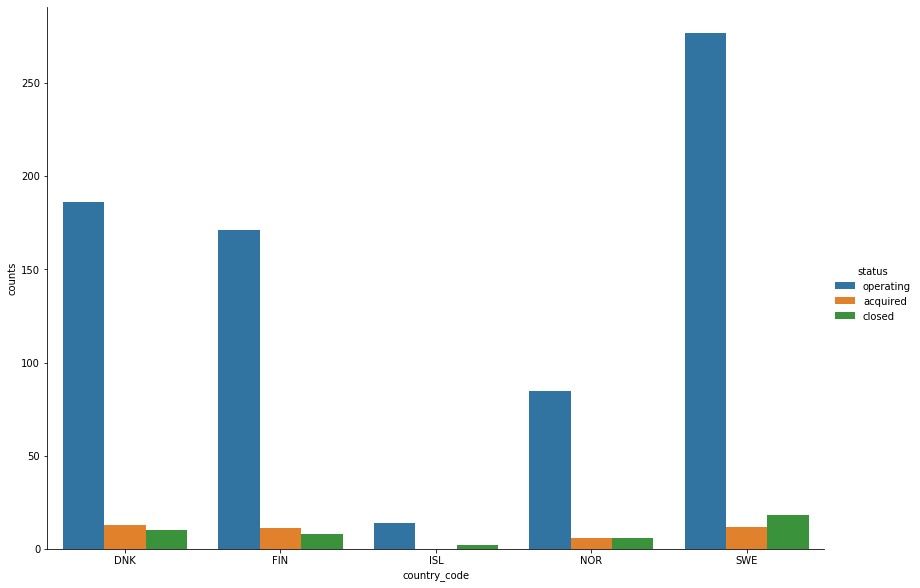

In [37]:
sns.catplot(x="country_code", y="counts", hue="status", kind="bar", data=startup1, height=8.27, aspect=11.7/8.27)

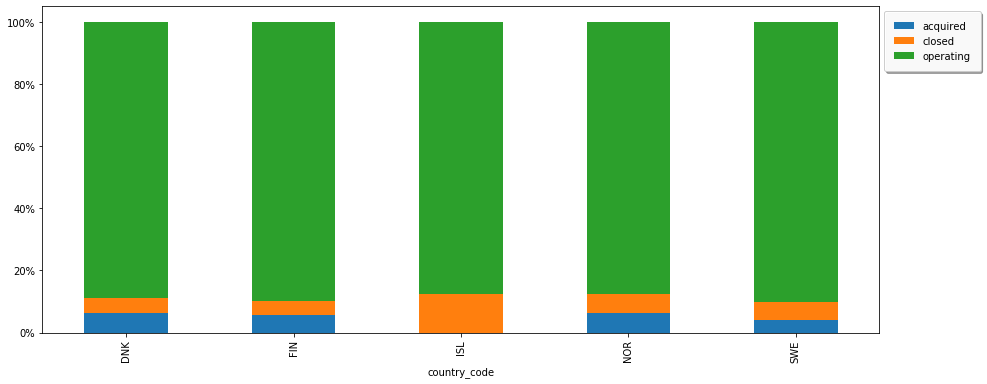

In [38]:
# Relationship between operating, acquired and closed startups in each Nordic country - normalised to a 100 percent bar chart 

import matplotlib.ticker as mtick

investments.groupby(['country_code','status']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1,1), frameon = True, fancybox = True, framealpha = 0.95, shadow = True, 
           borderpad = 1)
plt.show()

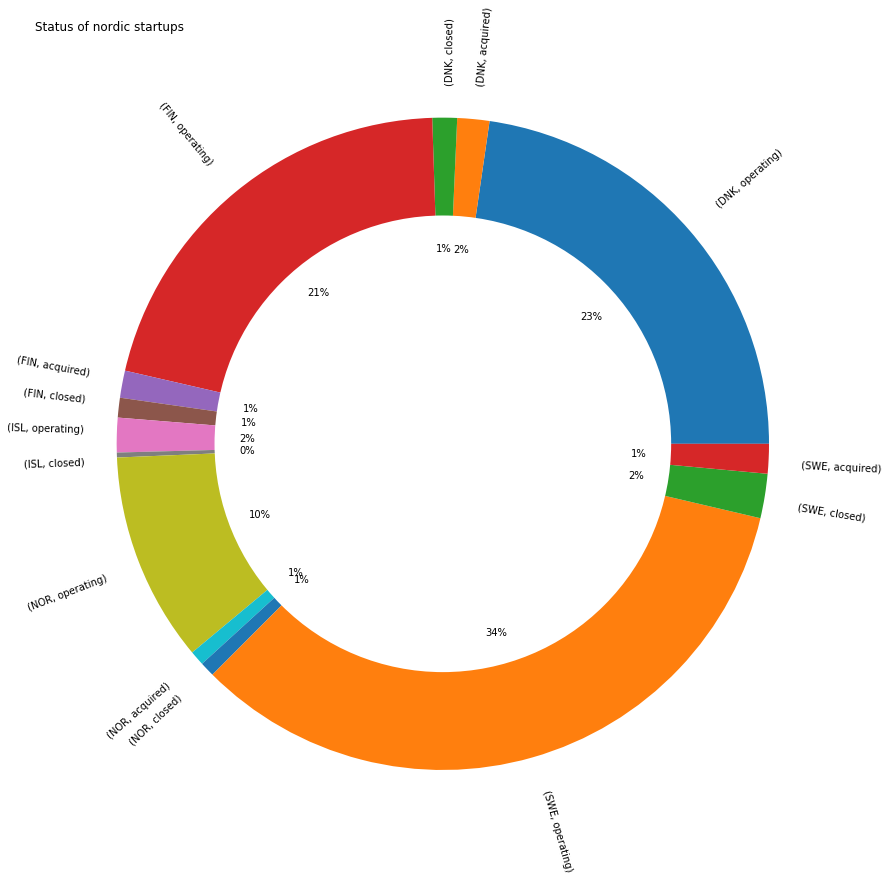

In [39]:
# Status of Nordic startups in donut form

chart = startup.plot(kind="pie", figsize=(20,15), autopct="%1.0f%%", rotatelabels=True )
cen_cir = plt.Circle((0,0),0.70, fc='w')
plt.gcf().gca().add_artist(cen_cir)

chart.set_ylabel('')
plt.title("Status of nordic startups", loc='left')
plt.show()

In [40]:
# Most funded startups/companies in Nordic countries

most_funded = investments.nlargest(20, ['funding_total_usd'])
most_funded

,country_code,name,market,funding_total_usd,status,region,funding_rounds,founded_at,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F
447,SWE,Spotify,Entertainment,537779080.0,operating,Stockholm,7.0,2006-07-14,2008-10-01,2013-11-21,0.0,537779080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21640000.0,50000000.0,16139080.0,100000000.0,100000000.0,250000000.0
779,DNK,Symphogen,Biotechnology,387185400.0,operating,Lyngby,6.0,2000-01-01,2006-01-10,2013-05-03,0.0,160400000.0,0.0,0.0,0.0,0.0,0.0,0.0,226785400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0,0.0,135400000.0
334,SWE,Klarna,Payments,282074000.0,operating,Stockholm,6.0,2005-02-11,2005-01-01,2014-03-14,0.0,166200000.0,0.0,0.0,0.0,0.0,80000.0,0.0,115794000.0,0.0,0.0,0.0,0.0,2200000.0,9000000.0,155000000.0,0.0,0.0,0.0
563,NOR,NorSun,Clean Technology,272120000.0,operating,Oslo,3.0,NaT,2006-11-07,2009-03-11,0.0,0.0,0.0,0.0,0.0,94000000.0,0.0,0.0,178120000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,FIN,Supercell,Games,272000000.0,acquired,Helsinki,3.0,2010-05-01,2011-05-25,2013-04-18,0.0,142000000.0,0.0,0.0,0.0,0.0,0.0,0.0,130000000.0,0.0,0.0,0.0,0.0,0.0,130000000.0,0.0,0.0,0.0,0.0
414,SWE,Recipharm,Biotechnology,210384730.0,operating,SWE - Other,1.0,1995-01-01,2014-09-19,2014-09-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210384730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
688,DNK,Genmab,Biotechnology,157000000.0,operating,Copenhagen,2.0,NaT,2009-10-01,2010-07-01,0.0,157000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,SWE,iZettle,Mobile Payments,108520072.0,operating,Stockholm,4.0,2010-04-01,2011-10-18,2014-07-14,0.0,108520072.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15317120.0,31400000.0,61802952.0,0.0,0.0,0.0
24,FIN,Blyk,App Marketing,107764700.0,operating,Helsinki,4.0,2006-01-01,2006-01-01,2010-09-13,0.0,107764700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35391000.0,0.0,50612000.0,0.0,0.0,0.0
568,NOR,OptiNose,Biotechnology,83500000.0,operating,Oslo,2.0,NaT,2010-06-07,2014-08-05,0.0,83500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83500000.0,0.0,0.0,0.0


In [41]:
Spotify_founded_year = investments['founded_at'][investments['name']=="Spotify"].dt.year.values[0]
Symphogen_founded_year  = investments['founded_at'][investments['name']=="Symphogen"].dt.year.values[0]
Klarna_founded_year = investments['founded_at'][investments['name']=="Klarna"].dt.year.values[0]
Supercell_founded_year  = investments['founded_at'][investments['name']=="Supercell"].dt.year.values[0]
Rovio_founded_year  = investments['founded_at'][investments['name']=="Rovio Entertainment"].dt.year.values[0]

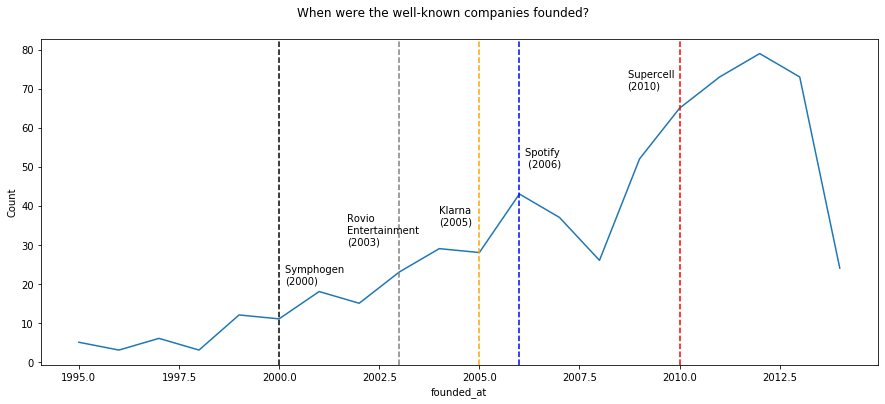

In [42]:
# Comparison of founding dates selected, successful Nordic startups

plt.rcParams['figure.figsize'] = 15,6
investments['name'][investments["founded_at"].dt.year >= 1995].groupby(investments["founded_at"].dt.year).count().plot(kind="line")
plt.ylabel('Count')

plt.axvline(Spotify_founded_year,color='blue',linestyle ="--")
plt.text(Spotify_founded_year+0.15, 50,"Spotify \n (2006)")

plt.axvline(Symphogen_founded_year,color='black',linestyle ="--")
plt.text(Symphogen_founded_year+0.15, 20,"Symphogen \n(2000)")

plt.axvline(Klarna_founded_year,color='orange',linestyle ="--")
plt.text(Klarna_founded_year-1.00, 35,"Klarna \n(2005)")

plt.axvline(Supercell_founded_year,color='red',linestyle ="--")
plt.text(Supercell_founded_year-1.30, 70,"Supercell \n(2010)")

plt.axvline(Rovio_founded_year,color='grey',linestyle ="--")
plt.text(Rovio_founded_year-1.30, 30,"Rovio \nEntertainment \n(2003)")

plt.title("When were the well-known companies founded?", fontdict=None, position= [0.48,1.05])
plt.show()

### **Visualisation: Startup status, Public grants, debt and a word about Finland**

<br>

In [43]:
# Total number of Nordic startups per market/industry with more than 1 million USD investment

most_high= investments[['market', 'name']][investments['funding_total_usd'] > 1000000].groupby(['market'], 
                                        as_index=False).count().sort_values('name', ascending=False)
most_high.head(20)
top20 = most_high.head(20)
top20

,market,name
87,Software,50
8,Biotechnology,46
57,Mobile,32
11,Clean Technology,20
41,Hardware + Software,17
38,Games,15
18,Curated Web,14
28,Enterprise Software,12
42,Health Care,12
0,Advertising,11


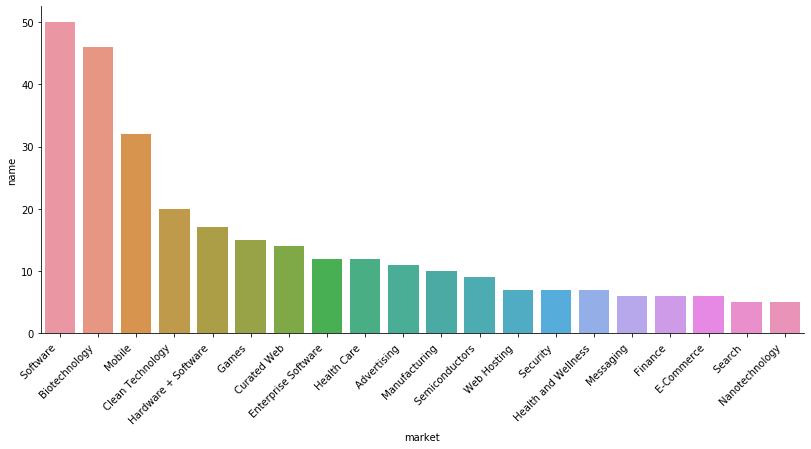

In [44]:
Nordm = sns.catplot(x="market", y="name",  kind="bar", data=top20, height=5.27, aspect=11.7/5.27)
Nordm.set_xticklabels(rotation=45, horizontalalignment='right')

In [45]:
# Total number of startups per Finnish market with more than 1 million USD investment

fin_high= investments[investments['country_code'] == 'FIN']

finh = fin_high[['market', 'name']][fin_high['funding_total_usd'] > 1000000].groupby(['market'], 
                                        as_index=False).count().sort_values('name', ascending=False)

Finl10=finh.head(10)
Finl10

,market,name
34,Mobile,11
45,Software,11
7,Biotechnology,7
24,Games,6
31,Manufacturing,6
12,Curated Web,4
42,Semiconductors,4
25,Hardware + Software,4
27,Health and Wellness,4
9,Clean Technology,3


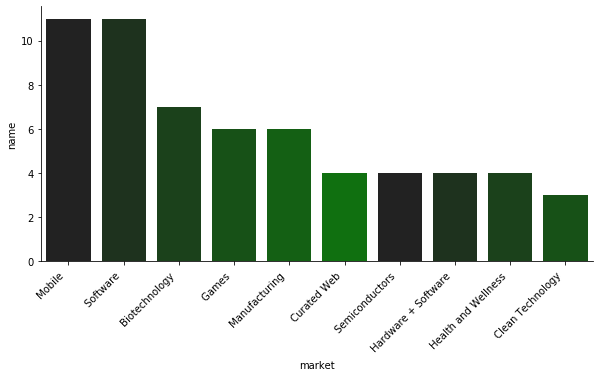

In [46]:
Finm = sns.catplot(x="market", y="name",  kind="bar", data=Finl10, height=4.27, aspect=8.7/4.27,palette=sns.dark_palette("green"))
Finm.set_xticklabels(rotation=45, horizontalalignment='right')

In [47]:
# Total number of startups per Swedish market with more than 1 million USD investment

swe_high= investments[investments['country_code'] == 'SWE']

sweh = swe_high[['market', 'name']][swe_high['funding_total_usd'] > 1000000].groupby(['market'], 
                                        as_index=False).count().sort_values('name', ascending=False)

SWL10=sweh.head(10)
SWL10


,market,name
3,Biotechnology,19
47,Software,17
32,Mobile,12
21,Hardware + Software,9
10,Curated Web,7
5,Clean Technology,7
19,Games,7
12,Enterprise Software,7
0,Advertising,5
11,E-Commerce,5


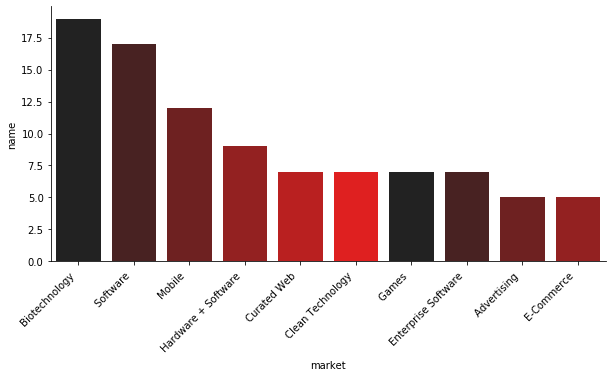

In [48]:
SWm = sns.catplot(x="market", y="name",  kind="bar", data=SWL10, height=4.27, aspect=8.7/4.27,palette=sns.dark_palette("red"))

SWm.set_xticklabels(rotation=45, horizontalalignment='right')

In [49]:
# Total number of startups per Norwegian market with more than 1 million USD investment

nor_high= investments[investments['country_code'] == 'NOR']

norh = nor_high[['market', 'name']][nor_high['funding_total_usd'] > 1000000].groupby(['market'], 
                                        as_index=False).count().sort_values('name', ascending=False)

Nor10 =norh.head(10)
Nor10

,market,name
23,Software,10
2,Biotechnology,6
3,Clean Technology,5
0,Advertising,4
15,Mobile,4
22,Semiconductors,2
21,Security,2
12,Health Care,2
24,Web Hosting,1
20,Search,1


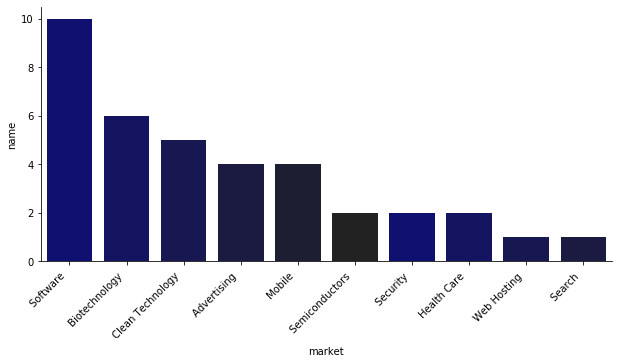

In [50]:
NRm = sns.catplot(x="market", y="name",  kind="bar", data=Nor10, height=4.27, aspect=8.7/4.27,palette=sns.dark_palette("navy", reverse=True))

NRm.set_xticklabels(rotation=45, horizontalalignment='right')

In [51]:
# Total number of startups per Danish market with more than 1 million USD investment

dnk_high= investments[investments['country_code'] == 'DNK']

dnkh = dnk_high[['market', 'name']][dnk_high['funding_total_usd'] > 1000000].groupby(['market'], 
                                        as_index=False).count().sort_values('name', ascending=False)

DN10=dnkh.head(10)
DN10

,market,name
1,Biotechnology,14
37,Software,11
2,Clean Technology,5
21,Mobile,5
12,Finance,3
5,Curated Web,3
16,Health Care,3
15,Hardware + Software,3
13,Games,2
31,SaaS,2


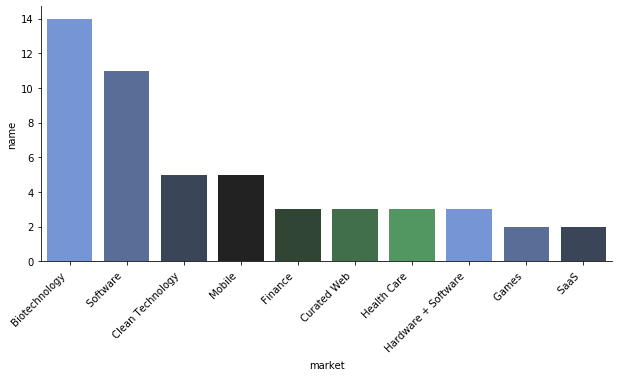

In [52]:
DNm = sns.catplot(x="market", y="name",  kind="bar", data=DN10, height=4.27, aspect=8.7/4.27,palette=sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

DNm.set_xticklabels(rotation=45, horizontalalignment='right')

In [53]:
# Total number of startups per Icelandic market with more than 1 million USD investment

isl_high= investments[investments['country_code'] == 'ISL']

islh = isl_high[['market', 'name']][isl_high['funding_total_usd'] > 1000000].groupby(['market'], 
                                        as_index=False).count().sort_values('name', ascending=False)

IS10=islh.head(10)
IS10

,market,name
0,Medical Devices,1
1,Software,1
2,Virtual Worlds,1


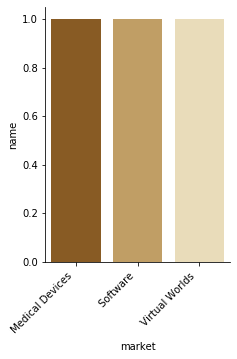

In [54]:
ISm = sns.catplot(x="market", y="name",  kind="bar", data=IS10, height=4.27, aspect=6.7/8.27,palette=sns.color_palette("BrBG", 7))

ISm.set_xticklabels(rotation=45, horizontalalignment='right')

Text(0.5, 1.0, ' debt_financing by country_code')

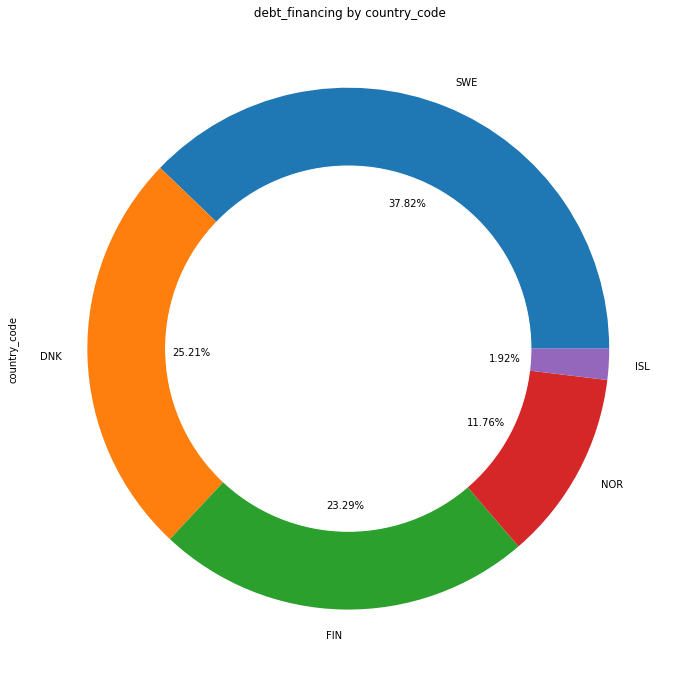

In [55]:
# 833 largest  debt_financing in the Nordic startups 


LDF = investments.nlargest(833,'debt_financing')
ax = LDF.country_code.value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(12,12))
add_circle = plt.Circle((0,0),0.7,color='white')
fig=plt.gcf()
fig.gca().add_artist(add_circle)
ax.set_title(' debt_financing by country_code')


Text(0.5, 1.0, ' grant recipient startups by country_code')

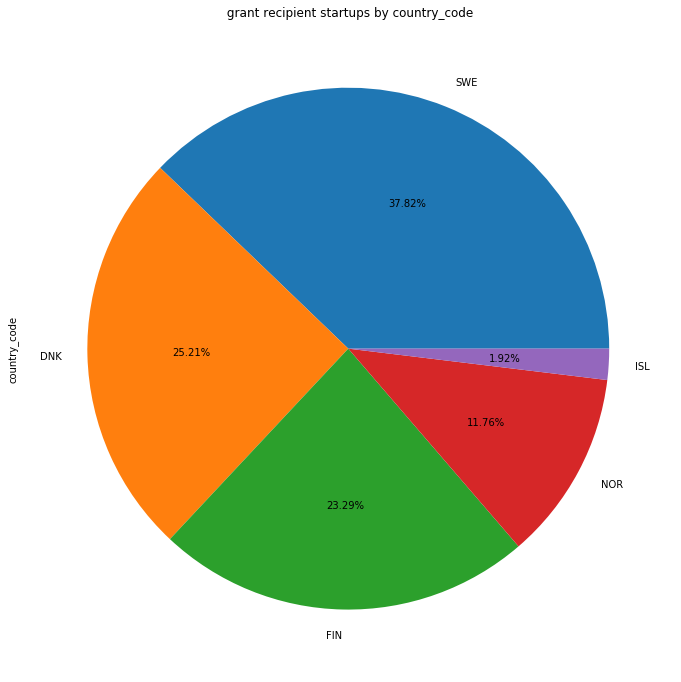

In [56]:
# grant recipients by country_code

LG = investments.nlargest(833,'grant')
ax = LG.country_code.value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(12,12))
figG=plt.gcf()
figG.gca()
ax.set_title(' grant recipient startups by country_code')



Text(0.5, 1.0, "Startups' 10 largest funding_total_used and respective venture in Finland's market")

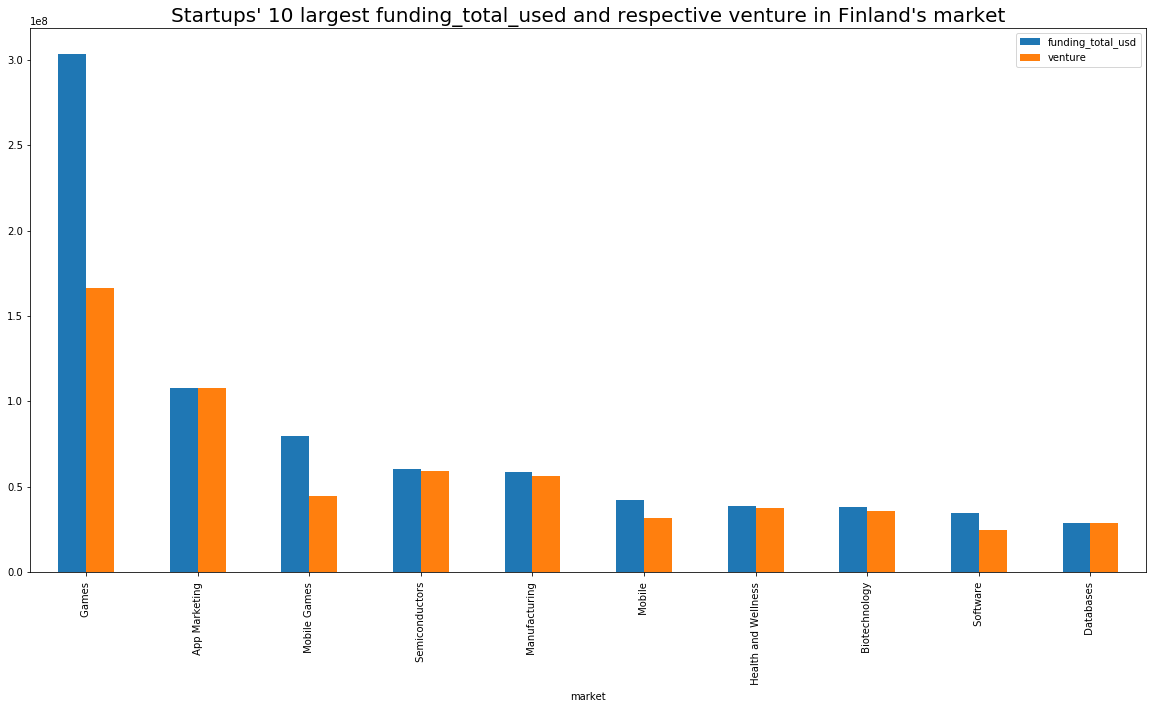

In [57]:
# 10 largest funding_total_used and respective venture in Finland market
gbf=investments[(investments['country_code'] == 'FIN')]

gg= gbf.groupby('market').sum()
LF = gg.nlargest(10,'funding_total_usd')
fg=LF.plot(kind ='bar', y=['funding_total_usd','venture'], figsize=(20,10))

fg.set_title('Startups\' 10 largest funding_total_used and respective venture in Finland\'s market',fontsize=(20))

Text(0.5, 1.0, "Startups' average funding_total_usd and venture in  finland by region")

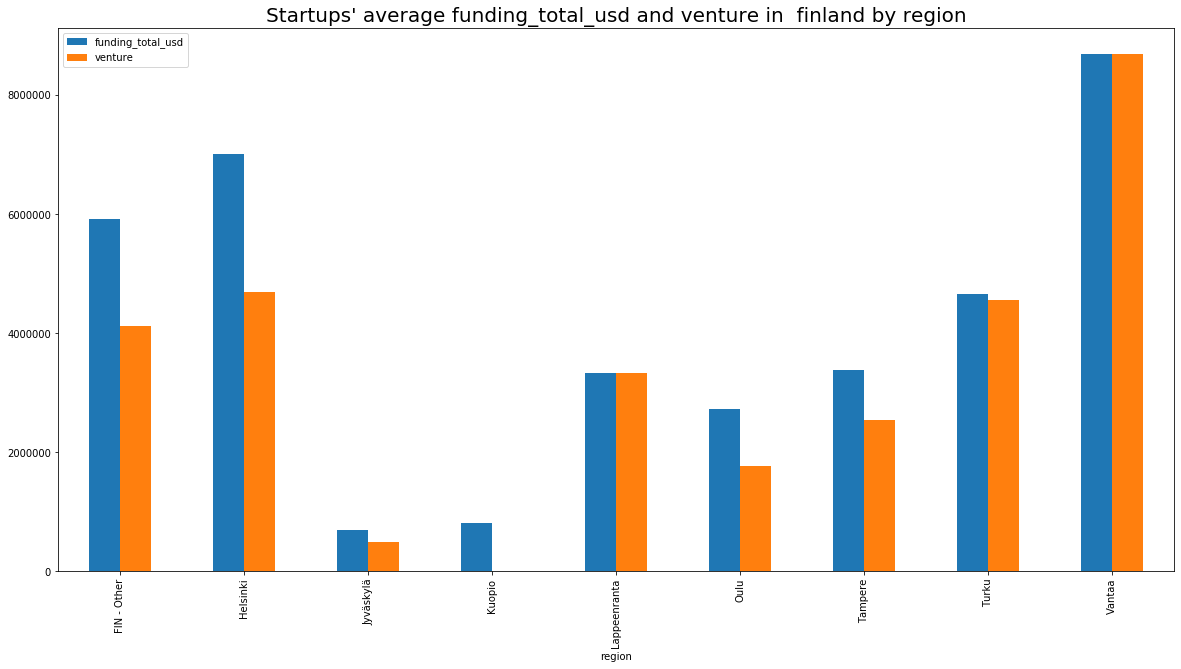

In [58]:
# The average fundding_total_used and respective venture by region in Finland
gbf=investments[(investments['country_code'] == 'FIN')]
gg= gbf.groupby('region').mean()
fg=gg.plot(kind ='bar', y=['funding_total_usd','venture'], figsize=(20,10))

fg.set_title('Startups\' average funding_total_usd and venture in  finland by region',fontsize=(20))


Text(0.5, 1.0, "Startups's,grant and debt_financing in  finland by region")

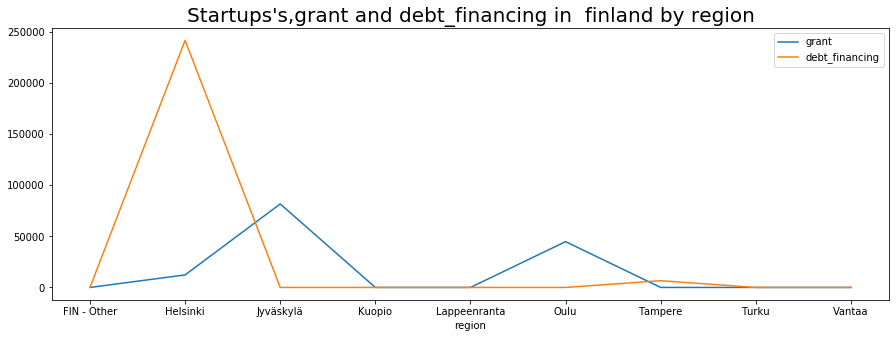

In [59]:
# The average funding from grant and debt_financing in Finland by region

gbf=investments[(investments['country_code'] == 'FIN')]
rg= gbf.groupby('region').mean()
fr=rg.plot(kind ='line', y=['grant','debt_financing'], figsize=(15,5))

fr.set_title('Startups\'s,grant and debt_financing in  finland by region',fontsize=(20))


Text(0.5, 1.0, '200 largest grant for startups in Finland by region')

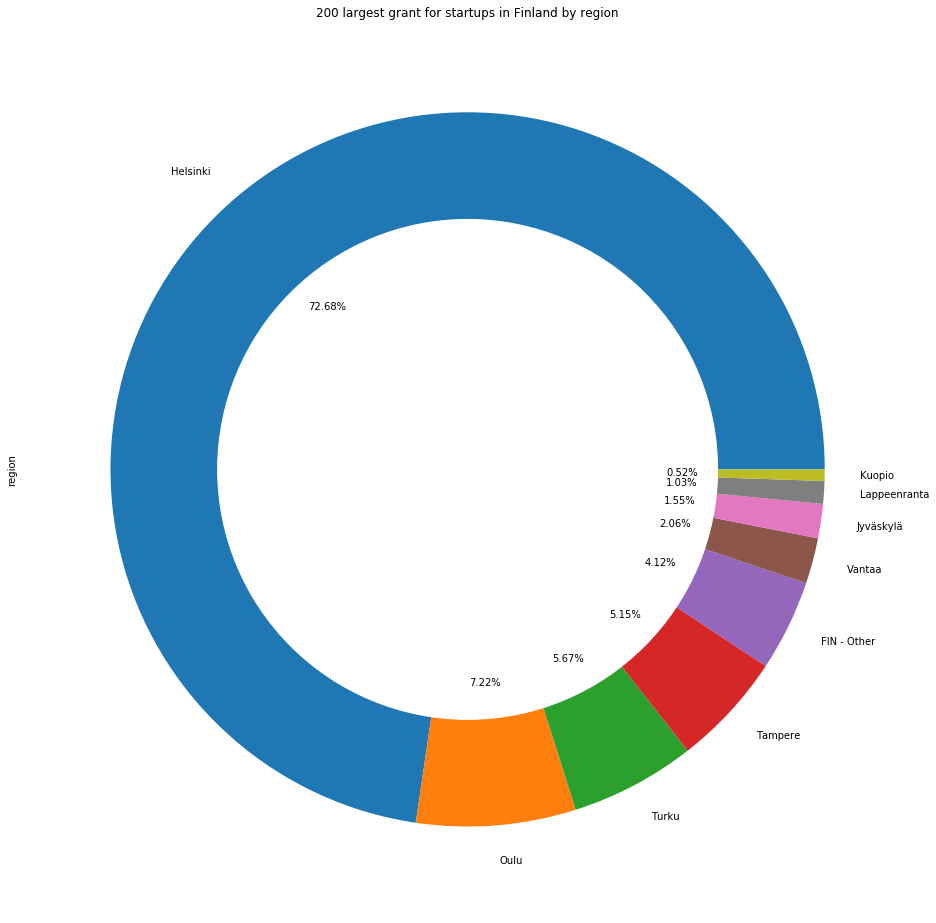

In [60]:
# 200 largest grant for startups in Finland by region'
fin =investments[(investments['country_code'] == 'FIN')]
Lfd = fin.nlargest(200,'grant')
ax = Lfd.region.value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(16,20))
add_circle = plt.Circle((0,0),0.7,color='white')
figd=plt.gcf()
figd.gca().add_artist(add_circle)
ax.set_title('200 largest grant for startups in Finland by region')


<br><br>
### **Visualisation: Success stories, funding rounds and private funding**


Text(0.5, 1.0, 'Funding sources in Nordic countries')

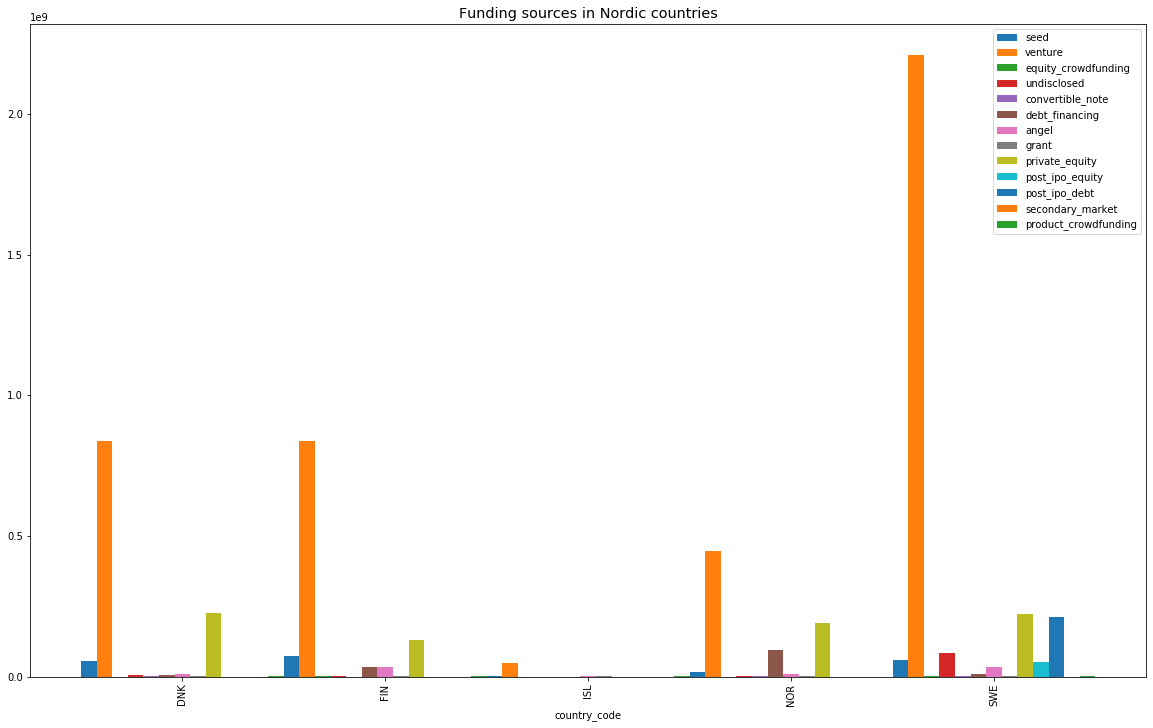

In [61]:
#checking differences in funding sources among the countries.
investments.groupby('country_code').sum()[['seed',
                                           'venture',
                                           'equity_crowdfunding', 
                                           'undisclosed', 
                                           'convertible_note',
                                           'debt_financing',
                                           'angel',
                                           'grant',
                                           'private_equity',
                                           'post_ipo_equity',
                                           'post_ipo_debt',
                                           'secondary_market', 
                                           'product_crowdfunding']].plot(kind = 'bar', figsize = (20,12), width = 1)
plt.title('Funding sources in Nordic countries', size = 'x-large')

In [62]:
investments['funding_in_seed'] = investments['seed'].map(lambda x :1  if x > 0 else 0)

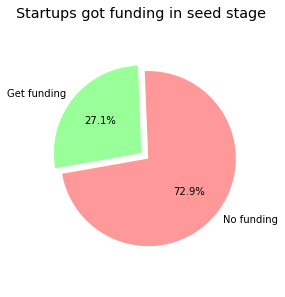

In [63]:
plt.rcParams['figure.figsize'] =4,4
labels = ['No funding','Get funding']
sizes = investments['funding_in_seed'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['#ff9999','#99ff99'] 

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
plt.axis('equal')
plt.tight_layout()
plt.title("Startups got funding in seed stage", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

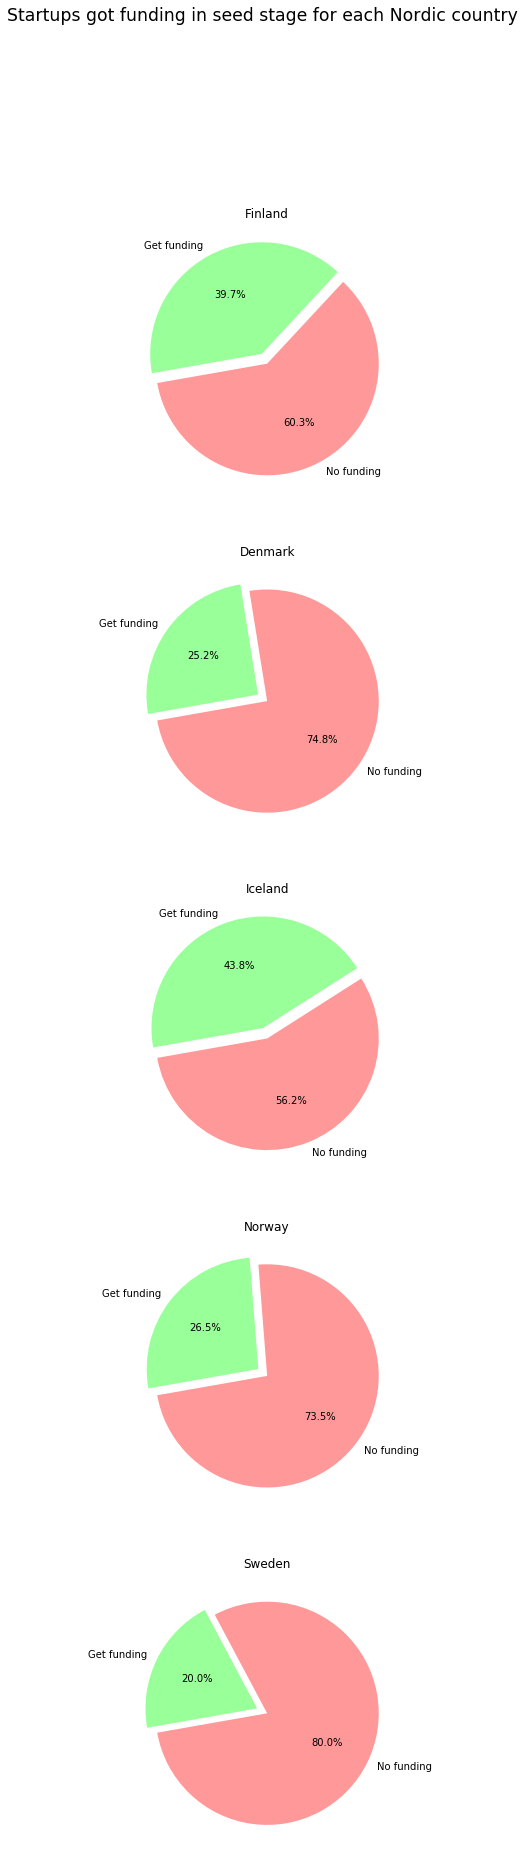

In [64]:
grouped_by_country = investments.groupby('country_code')
fin = grouped_by_country.get_group('FIN')
dnk = grouped_by_country.get_group('DNK')
isl = grouped_by_country.get_group('ISL')
nor = grouped_by_country.get_group('NOR')
swe = grouped_by_country.get_group('SWE')

fig, ax = plt.subplots(nrows=5, ncols=1, figsize = (5,30))

labels = ['No funding','Get funding']
sizes_fin = fin['funding_in_seed'].value_counts().tolist()
sizes_dnk = dnk['funding_in_seed'].value_counts().tolist()
sizes_isl = isl['funding_in_seed'].value_counts().tolist()
sizes_nor = nor['funding_in_seed'].value_counts().tolist()
sizes_swe = swe['funding_in_seed'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['#ff9999','#99ff99'] 

ax[0].set_title("Finland")
ax[0].pie(sizes_fin, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[1].set_title("Denmark")
ax[1].pie(sizes_dnk, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[2].set_title("Iceland")
ax[2].pie(sizes_isl, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[3].set_title("Norway")
ax[3].pie(sizes_nor, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[4].set_title("Sweden")
ax[4].pie(sizes_swe, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
fig.suptitle('Startups got funding in seed stage for each Nordic country' , size = 'xx-large')
plt.show()


In [65]:
investments['funding_vc'] = investments['venture'].map(lambda v :1  if v > 0 else 0)

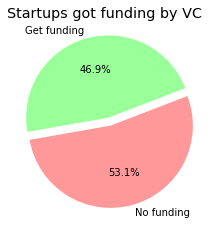

In [66]:
plt.rcParams['figure.figsize'] =3,3
labels = ['No funding','Get funding']
sizes = investments['funding_vc'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['#ff9999','#99ff99'] 

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
plt.axis('equal')
plt.tight_layout()
plt.title("Startups got funding by VC", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

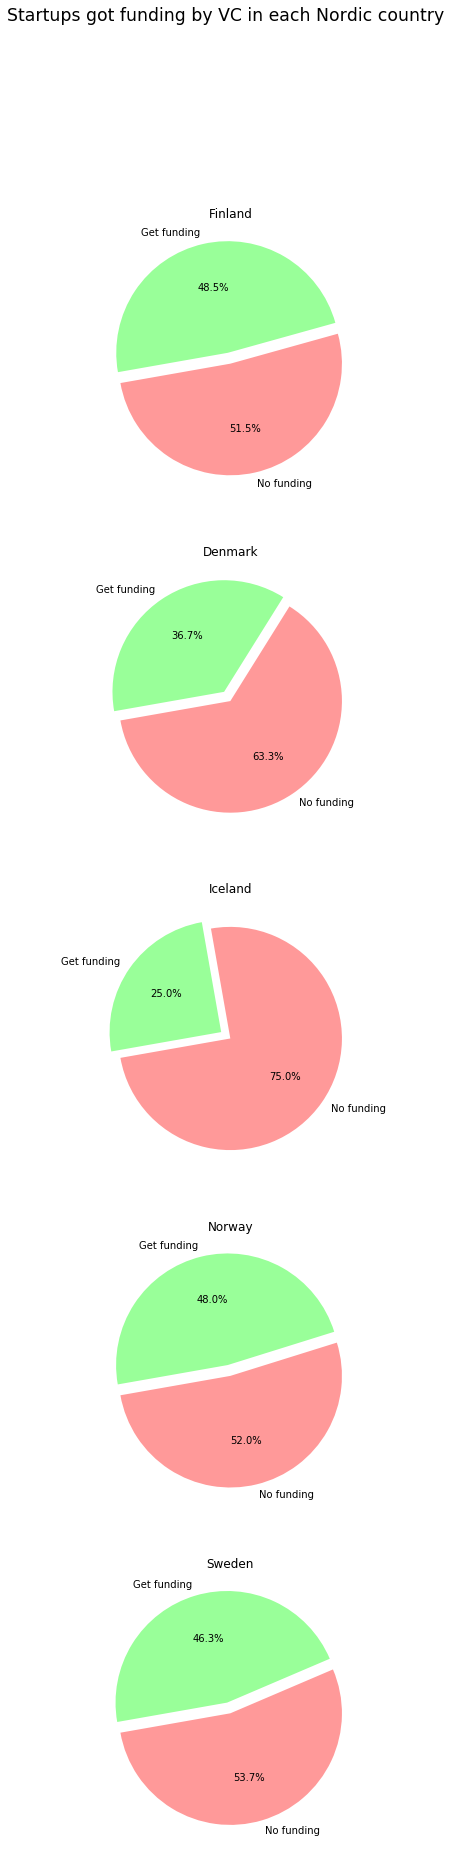

In [67]:
grouped_by_country = investments.groupby('country_code')
fin = grouped_by_country.get_group('FIN')
dnk = grouped_by_country.get_group('DNK')
isl = grouped_by_country.get_group('ISL')
nor = grouped_by_country.get_group('NOR')
swe = grouped_by_country.get_group('SWE')

fig, ax = plt.subplots(nrows=5, ncols=1, figsize = (5,30))

labels = ['No funding','Get funding']
sizes_fin = fin['funding_vc'].value_counts().tolist()
sizes_dnk = dnk['funding_vc'].value_counts().tolist()
sizes_isl = isl['funding_vc'].value_counts().tolist()
sizes_nor = nor['funding_vc'].value_counts().tolist()
sizes_swe = swe['funding_vc'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['#ff9999','#99ff99'] 

ax[0].set_title("Finland")
ax[0].pie(sizes_fin, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[1].set_title("Denmark")
ax[1].pie(sizes_dnk, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[2].set_title("Iceland")
ax[2].pie(sizes_isl, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[3].set_title("Norway")
ax[3].pie(sizes_nor, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[4].set_title("Sweden")
ax[4].pie(sizes_swe, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
fig.suptitle("Startups got funding by VC in each Nordic country" , size = 'xx-large')
plt.show()

In [68]:
investments['funding_angel'] = investments['angel'].map(lambda a :1  if a > 0 else 0)

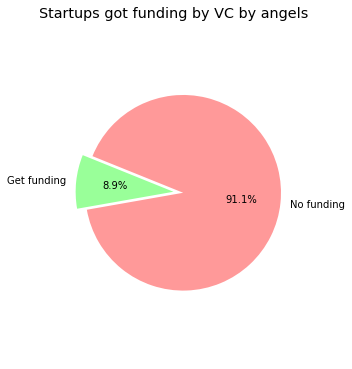

In [69]:
plt.rcParams['figure.figsize'] =5,5
labels = ['No funding','Get funding']
sizes = investments['funding_angel'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['#ff9999','#99ff99'] 

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
plt.axis('equal')
plt.tight_layout()
plt.title("Startups got funding by VC by angels", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

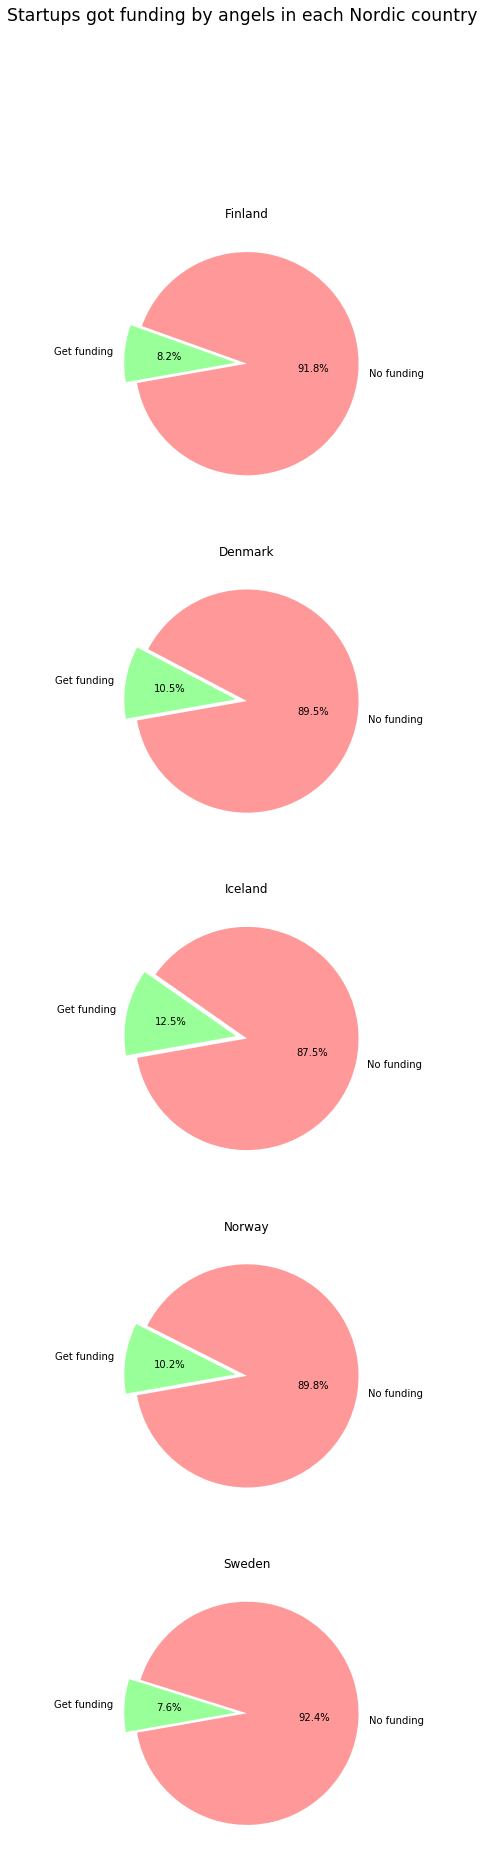

In [70]:
grouped_by_country = investments.groupby('country_code')
fin = grouped_by_country.get_group('FIN')
dnk = grouped_by_country.get_group('DNK')
isl = grouped_by_country.get_group('ISL')
nor = grouped_by_country.get_group('NOR')
swe = grouped_by_country.get_group('SWE')

fig, ax = plt.subplots(nrows=5, ncols=1, figsize = (5,30))

labels = ['No funding','Get funding']
sizes_fin = fin['funding_angel'].value_counts().tolist()
sizes_dnk = dnk['funding_angel'].value_counts().tolist()
sizes_isl = isl['funding_angel'].value_counts().tolist()
sizes_nor = nor['funding_angel'].value_counts().tolist()
sizes_swe = swe['funding_angel'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['#ff9999','#99ff99'] 

ax[0].set_title("Finland")
ax[0].pie(sizes_fin, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[1].set_title("Denmark")
ax[1].pie(sizes_dnk, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[2].set_title("Iceland")
ax[2].pie(sizes_isl, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[3].set_title("Norway")
ax[3].pie(sizes_nor, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
ax[4].set_title("Sweden")
ax[4].pie(sizes_swe, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
fig.suptitle("Startups got funding by angels in each Nordic country" , size = 'xx-large')
plt.show()

In [71]:
# Total number of values and sum of each round (A - F) 

print('Total number of values in round_A: ', len(investments[investments['round_A'] != 0]))
print('Sum of round_A: $', investments['round_A'].sum())
print('')
print('Total number of values in round_B: ', len(investments[investments['round_B'] != 0]))
print('Sum of round_B: $', investments['round_B'].sum())
print('')
print('Total number of values in round_C: ', len(investments[investments['round_C'] != 0]))
print('Sum of round_C: $', investments['round_C'].sum())
print('')
print('Total number of values in round_D: ', len(investments[investments['round_D'] != 0]))
print('Sum of round_D: $', investments['round_D'].sum())
print('')
print('Total number of values in round_E: ', len(investments[investments['round_E'] != 0]))
print('Sum of round_E: $', investments['round_E'].sum())
print('')
print('Total number of values in round_F: ', len(investments[investments['round_F'] != 0]))
print('Sum of round_F: $', investments['round_F'].sum())

Total number of values in round_A:  136
Sum of round_A: $ 823159181.0

Total number of values in round_B:  59
Sum of round_B: $ 650998988.0

Total number of values in round_C:  24
Sum of round_C: $ 633185900.0

Total number of values in round_D:  6
Sum of round_D: $ 175710000.0

Total number of values in round_E:  2
Sum of round_E: $ 116000000.0

Total number of values in round_F:  3
Sum of round_F: $ 389200204.0


In [72]:
rounds = ['round_A','round_B','round_C','round_D','round_E','round_F']
amount = [investments['round_A'].sum(),
          investments['round_B'].sum(),
          investments['round_C'].sum(),
          investments['round_D'].sum(),
          investments['round_E'].sum(),
          investments['round_F'].sum()]

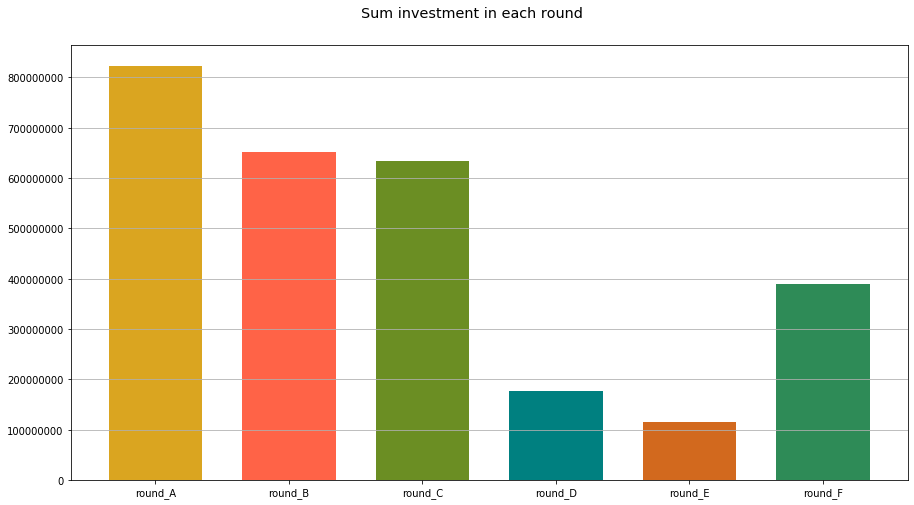

In [73]:
plt.rcParams['figure.figsize'] = 15,8
height = amount
bars =  rounds
y_pos = np.arange(len(bars))

plt.bar(y_pos, height , width=0.7, color= ['goldenrod','tomato','olivedrab','teal','chocolate','seagreen'] )
plt.ticklabel_format(style = 'plain')
plt.xticks(y_pos, bars)
ax = plt.axes()        
ax.yaxis.grid()
plt.title("Sum investment in each round", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

<br><br>

    
### **In closing: conclusions and future opportunities for research**

<br>

1) **Cleanup and collaboration** 
- Online collaboration tools are only as strong as their weakest link: in Google Colab’s case, if all participants have full editing access to a file, but Colab keeps asking for authorisation, you need to start hacking solutions. 
- Try not to change software, tools, platforms or update py modules in the middle of a project, it may cause problems or change your output in unexpected ways. 



2) **Status, scale and market segments**
- We can see that there is still a significantly larger volume of startups coming out of Sweden than Finland, and that the startups are largely driven by the software, biotech and mobile market segments. Certain large companies such as Spotify and Supercell account for a large part of this.
- The ratio of acquired startups (in 'status') to the total seems to be lower than one would expect based on the public perception of fast-moving startup culture.
- The top 5 funded startups can be found in entertainment (Spotify leading the way), biotech (Symphogen), payments (Klarna), clean technology (NorSun), and games (Supercell).
- according to our data, startup formation has had two spikes in 2006 and 2012.  


3) **Public grants, debt and Finland**
- It is likely that taxation and incentives would play a part in investment. Unfortunately, this didn't form a part of our dataset, but is a worthy area of research in the future. Here, a comparison of neighbouring countries could yield an understanding e.g. of Finland's place in the startup investment arena.
- There were 11 startups each in the categories of Mobile and Software, and 7 in Biotech, with a higher than 1 million USD investment in the Finnish market. By comparison, the Nordic figures put the number of startups with over 1 million USD investment at 50 startups (Software), 46 startups (Biotech) and 32 (Mobile). We can see that the Nordic figures reveal a higher focus on the Biotech segment than in Finland.
- Startups seem to take more debt than receive grants in Finland, although the main investment type is still venture capital, and those grants are focused mostly in the Helsinki region, with Oulu coming in second and Turku third. The further we move into the periphery, the fewer the grants in an industry that is built on decentralisation.  
 

4) **Success stories, funding rounds and private funding**

- Data for interesting questions related to who is acquiring startups was thin. Yes, there was data related to how many startups had been acquired, but we would need further research to understand better the retention of IP in the Nordic countries or Finland.
- To this end, we would have liked to take advantage of such additional data to employ Machine Learning techniques for predictions of trends in startup investment.
- We can see that, overall,  just over a quarter of startups got seed funding, which is slightly higher in Finland at 39.7 percent. Only Iceland has a higher share of startups receiving seed funding at 43.8 percent. 
- When it comes to venture capital funding, however, Iceland is the lowest at 25 percent with Finland (48.5 percent) sitting roughly at the Nordic average of 46.9 percent. 
- Angel funding accounts for 8.9 percent for the Nordic countries, with most companies in this area - Finland sits at 8.2 percent.


---
